In [1]:
!pip install seaborn

In [2]:
!pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import display_html
from sklearn.ensemble import RandomForestClassifier
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Data_Preparation/Dataset_ATS_v2.csv')# Load the original dataset and check the sample
data.shape
data.sample()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
6555,Male,0,Yes,4,Yes,No,DSL,One year,45,No


In [3]:
numeric_features = ['Churn', 'InternetService', 'SeniorCitizen', 'gender', 'PhoneService', 'MultipleLines', 'Dependents', 'tenure', 'MonthlyCharges', 'Contract']
data = data[numeric_features].copy()
#Clean the data
# Convert gender to numeric format
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0}) 
distribution = data['gender'].value_counts(normalize=True)
print(distribution)# Keep selected columns and make a copy

gender
1    0.504756
0    0.495244
Name: proportion, dtype: float64


In [4]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})# Convert data to binary
print(data['Churn'])

0       1
1       0
2       0
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [5]:
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})# Convert data to binary
print(data['PhoneService'])

0       0
1       1
2       1
3       1
4       1
       ..
7038    1
7039    1
7040    1
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64


In [6]:
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})# Convert data to binary
print(data['Dependents'])

0       0
1       0
2       1
3       0
4       0
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7043, dtype: int64


In [7]:
data['MultipleLines'] = data['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})# Convert data to binary
print(data['MultipleLines'])

0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    0
7041    1
7042    0
Name: MultipleLines, Length: 7043, dtype: int64


In [8]:
data['InternetService'] = data['InternetService'].map({'DSL': 2, 'Fiber optic': 1, 'No': 0})# Convert data to binary
print(data['InternetService'])

0       2
1       2
2       2
3       2
4       1
       ..
7038    2
7039    1
7040    2
7041    1
7042    1
Name: InternetService, Length: 7043, dtype: int64


In [9]:
data['Contract'] = data['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})# Convert data to binary
print(data['Contract'])

0       0
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    2
Name: Contract, Length: 7043, dtype: int64


In [10]:
print(data.isnull().sum()) #Check the cleaning result

Churn              0
InternetService    0
SeniorCitizen      0
gender             0
PhoneService       0
MultipleLines      0
Dependents         0
tenure             0
MonthlyCharges     0
Contract           0
dtype: int64


In [11]:
data.shape # Show number of rows and columns

(7043, 10)

In [12]:
data.to_csv('Data_Preparation/dataset(preprocessed).csv', index=False) # Save cleaned dataset

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Create a StandardScaler object 
data_scaled = scaler.fit_transform(data)# Fit and transform the dataset

In [14]:
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=66) # Split data                                                     

In [15]:
print("train:", X_train.shape)
print("test:", X_test.shape)

train: (5634, 10)
test: (1409, 10)


In [16]:
pd.DataFrame(X_train).to_csv('Data_Preparation/Train Data.csv', index=False)
pd.DataFrame(X_test).to_csv('Data_Preparation/Test Data.csv', index=False)#save set

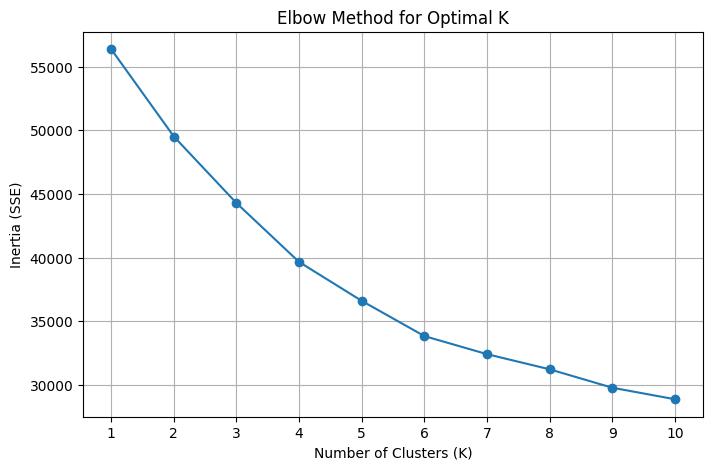

In [17]:
#try to find k value
inertia = []
K_range = range(1, 11)  #from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=66, n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
#Draw the graph
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [18]:
optimal_k = 4 #set k=4
#creat k mean modle
kmeans = KMeans(n_clusters=optimal_k, random_state=66, n_init=10)
clusters = kmeans.fit_predict(data_scaled)# Fit and predict cluster labels on scaled data
data['Cluster'] = clusters

In [19]:
joblib.dump(kmeans, 'Clustering_Analysis/kmeans_model.pkl')

['Clustering_Analysis/kmeans_model.pkl']

In [20]:
training_script = '''
from sklearn.cluster import KMeans
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load data
data = pd.read_csv("Data_Preparation/dataset(preprocessed).csv")
# Scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Train model
kmeans = KMeans(n_clusters=4, random_state=66, n_init=10)
kmeans.fit(data_scaled)
# Save model
joblib.dump(kmeans, "Clustering_Analysis/kmeans_model.pkl")
print("Model saved successfully.")
'''
with open("Clustering_Analysis/kmeans model.py", "w") as f:
    f.write(training_script)

In [21]:
print(data.head())

   Churn  InternetService  SeniorCitizen  gender  PhoneService  MultipleLines  \
0      1                2              0       0             0              0   
1      0                2              0       1             1              0   
2      0                2              0       0             1              0   
3      1                2              0       0             1              0   
4      0                1              0       1             1              0   

   Dependents  tenure  MonthlyCharges  Contract  Cluster  
0           0       1              25         0        3  
1           0      41              25         1        2  
2           1      52              19         0        2  
3           0       1              76         1        0  
4           0      67              51         0        1  


In [22]:
print(data['tenure'].unique())

[ 1 41 52 67 68 23 72 70 34 28 18 15 11 37 22 46 51  5 45 29 50 27 60 17
 33 66 69 57  8 14 25  7 13 19 59  9  3 10 39 54 35 12 31 53 30 48 38 65
 24 40 43 71 61 26 42 21 56  4  6 55  2 44 62 63 49 20 16 47 32 64 58 36
  0]


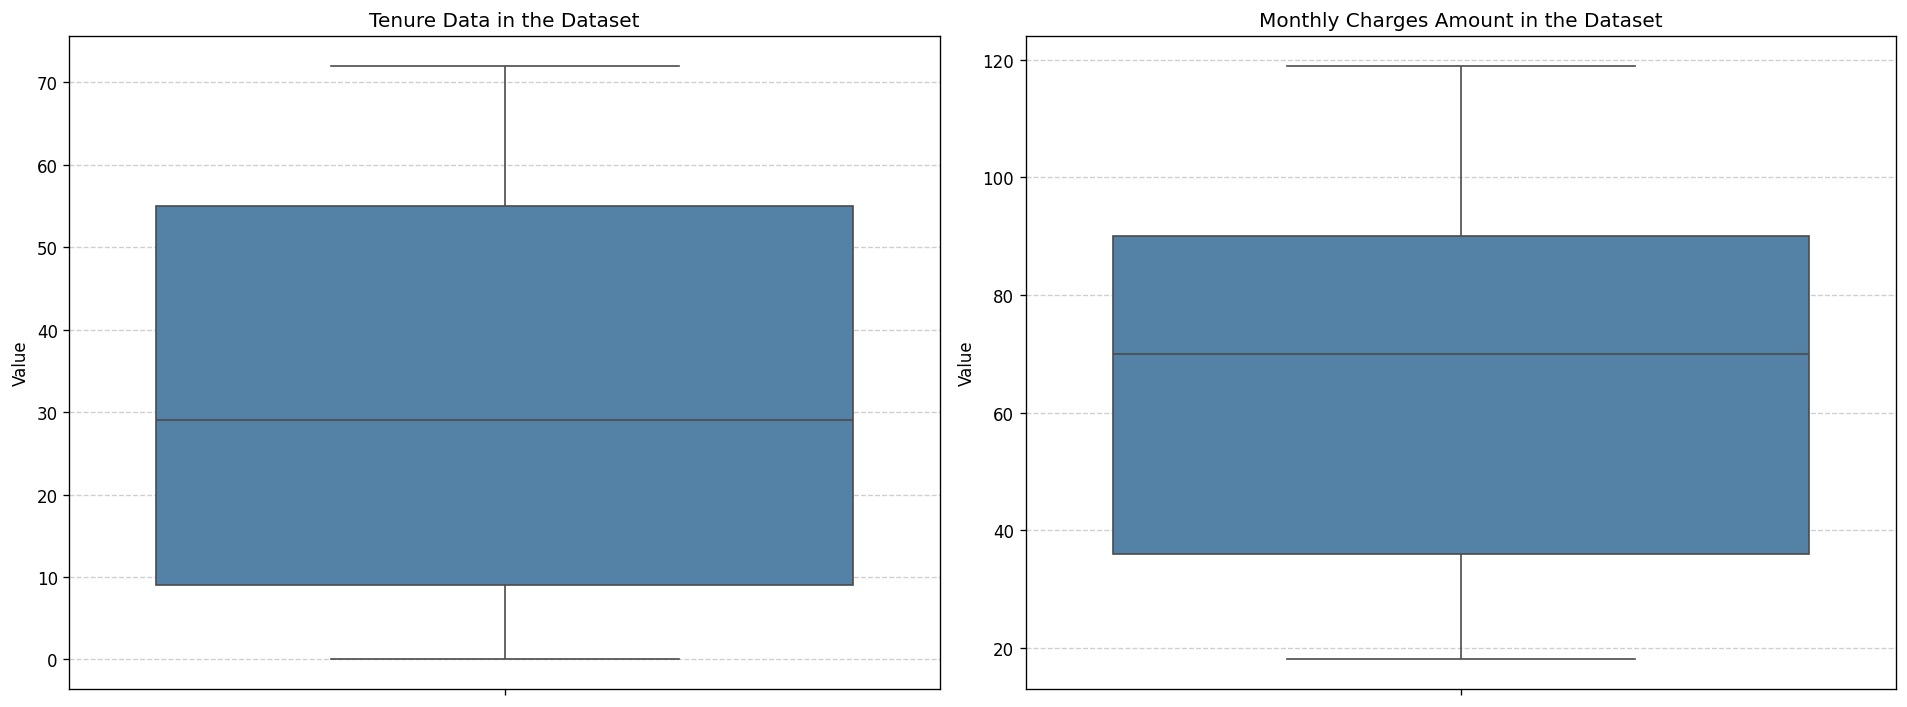

In [23]:
#Visualize feature distribution using boxplots
feature_map = {
    'tenure': 'Tenure Data',
    'MonthlyCharges': 'Monthly Charges Amount'
}
plt.figure(figsize=(16, 6), dpi=120)
for i, (col, col_name) in enumerate(feature_map.items(), 1):
    plt.subplot(1, 2, i) 
    sns.boxplot(y=data[col], color='#4682B4')
    plt.title(f'{col_name} in the Dataset', fontsize=12)
    plt.ylabel('Value', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

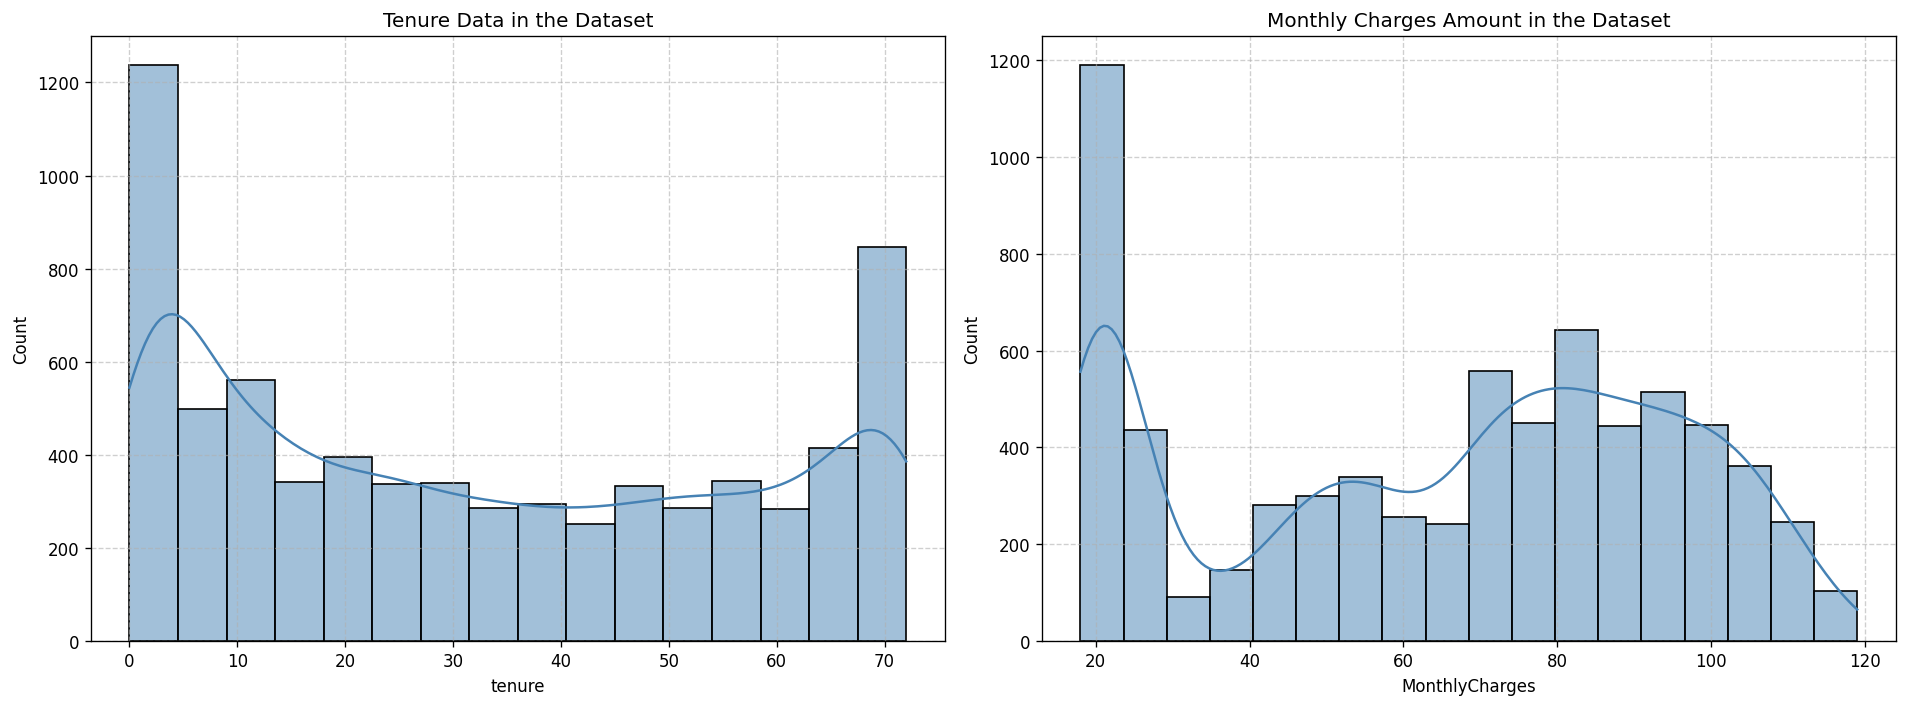

In [24]:
#Plot histograms for tenure and MonthlyCharges
feature_map = {
    'tenure': 'Tenure Data',
    'MonthlyCharges': 'Monthly Charges Amount'
}
plt.figure(figsize=(16, 6), dpi=120)
for i, (col, col_name) in enumerate(feature_map.items(), 1):
    plt.subplot(1, 2, i)  
    sns.histplot(x=data[col], kde=True, color='#4682B4')
    plt.title(f'{col_name} in the Dataset', fontsize=12)
    plt.ylabel('Count', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

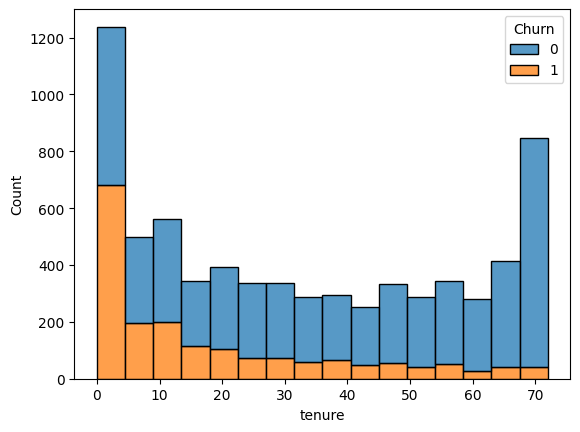

In [25]:
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack') #Plot stacked histogram of tenure by Churn

Text(0.5, 1.0, 'Monthly Charges vs. Tenure')

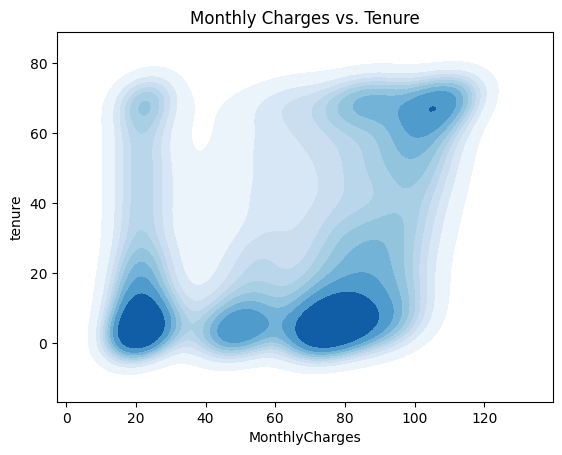

In [26]:
#2D KDE Plot
sns.kdeplot(
    data=data, x='MonthlyCharges', y='tenure',
    cmap="Blues", fill=True, thresh=0.05
)
plt.title('Monthly Charges vs. Tenure')

In [27]:
df = data.copy()# Create a copy

In [28]:
df['Churn'] = data['Churn']
df['gender'] = data['gender']
df_dummies = pd.get_dummies(df)#prepare for one-hot

In [29]:
category_cols_pie = [
    'gender', 'SeniorCitizen', 'InternetService', 
    'PhoneService', 'MultipleLines', 'Dependents', 'Contract', 'Churn'
]

In [30]:
#Change lable to show
label_mappings = {
    'gender': {0: 'Male', 1: 'Female'},
    'SeniorCitizen': {0: 'Not Senior', 1: 'Senior'},
    'InternetService': {0: 'DSL', 1: 'Fiber Optic', 2: 'No Internet'},
    'PhoneService': {0: 'No Service', 1: 'Has Service'},
    'MultipleLines': {0: 'No', 1: 'Yes', 2: 'No Phone'},
    'Dependents': {0: 'No Dependents', 1: 'Has Dependents'},
    'Contract': {0: 'Month-to-Month', 1: 'One Year', 2: 'Two Year'},
    'Churn': {0: 'No Churn', 1: 'Churned'}
}

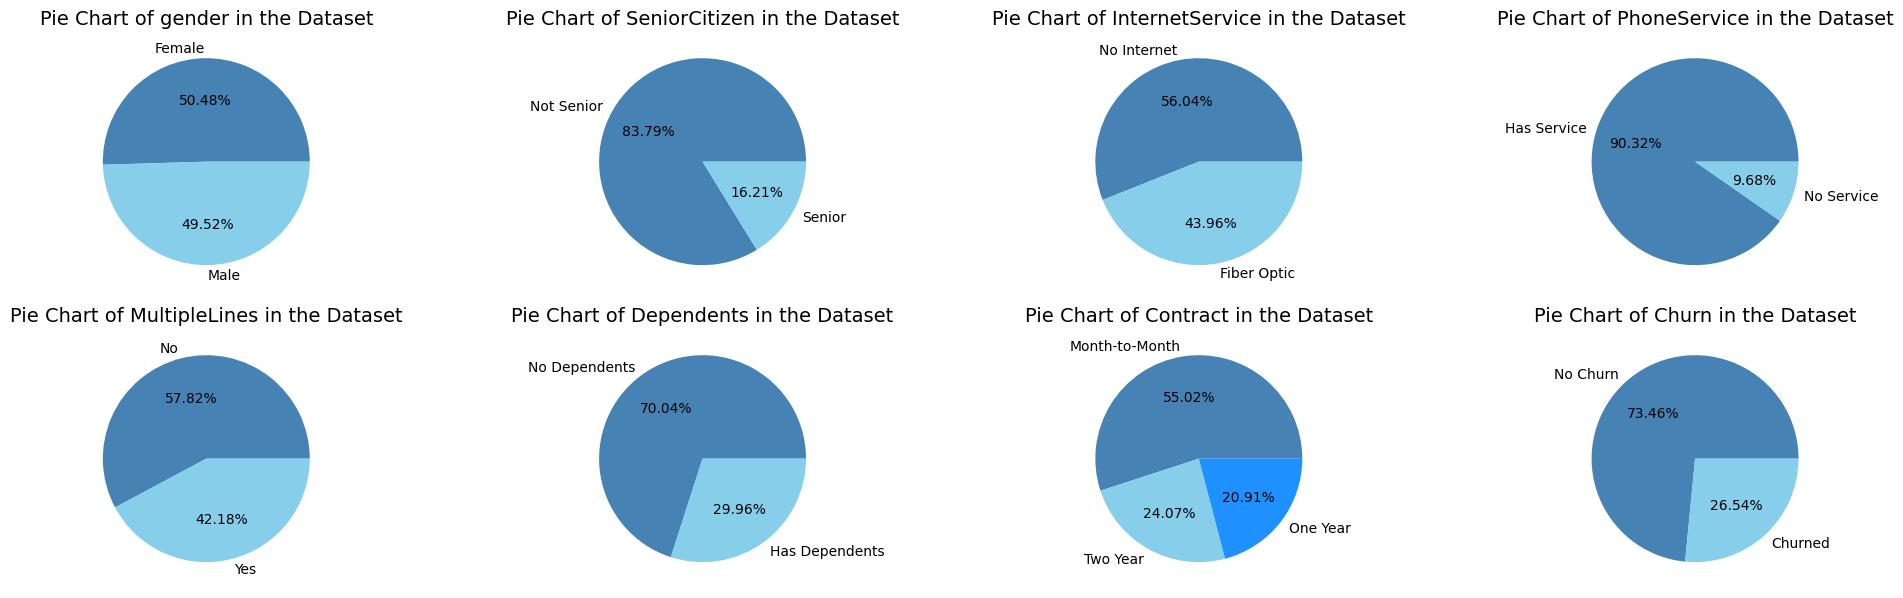

In [31]:
#Plot pie charts with readable labels
plt.figure(figsize=(20, 15), dpi=100)
for i, col in enumerate(category_cols_pie, 1):
    plt.subplot(5, 4, i)
    # Replace numeric labels
    if col in label_mappings:
        data[col] = data[col].replace(label_mappings[col])
# Calculate category proportions
    distribution = data[col].value_counts(normalize=True)
    # Draw pie chart
    plt.pie(distribution, labels=distribution.index, autopct='%.2f%%',
            colors=['#4682B4', '#87CEEB', '#1E90FF', 'lightcoral'])
    plt.title(f'Pie Chart of {col} in the Dataset', fontsize=14)

plt.tight_layout()
plt.show()


In [32]:
#One-hot encode
df_dummies = pd.get_dummies(df)
df_dummies.sample(5)
df_dummies[['Churn', 'tenure', 'MonthlyCharges', 'gender']].T
df_dummies.shape

(7043, 11)

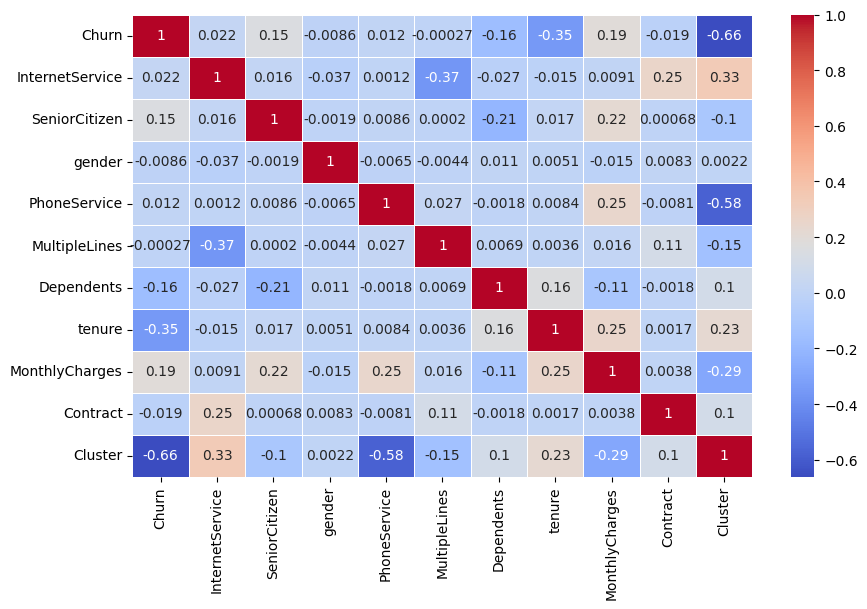

In [33]:
#Full Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

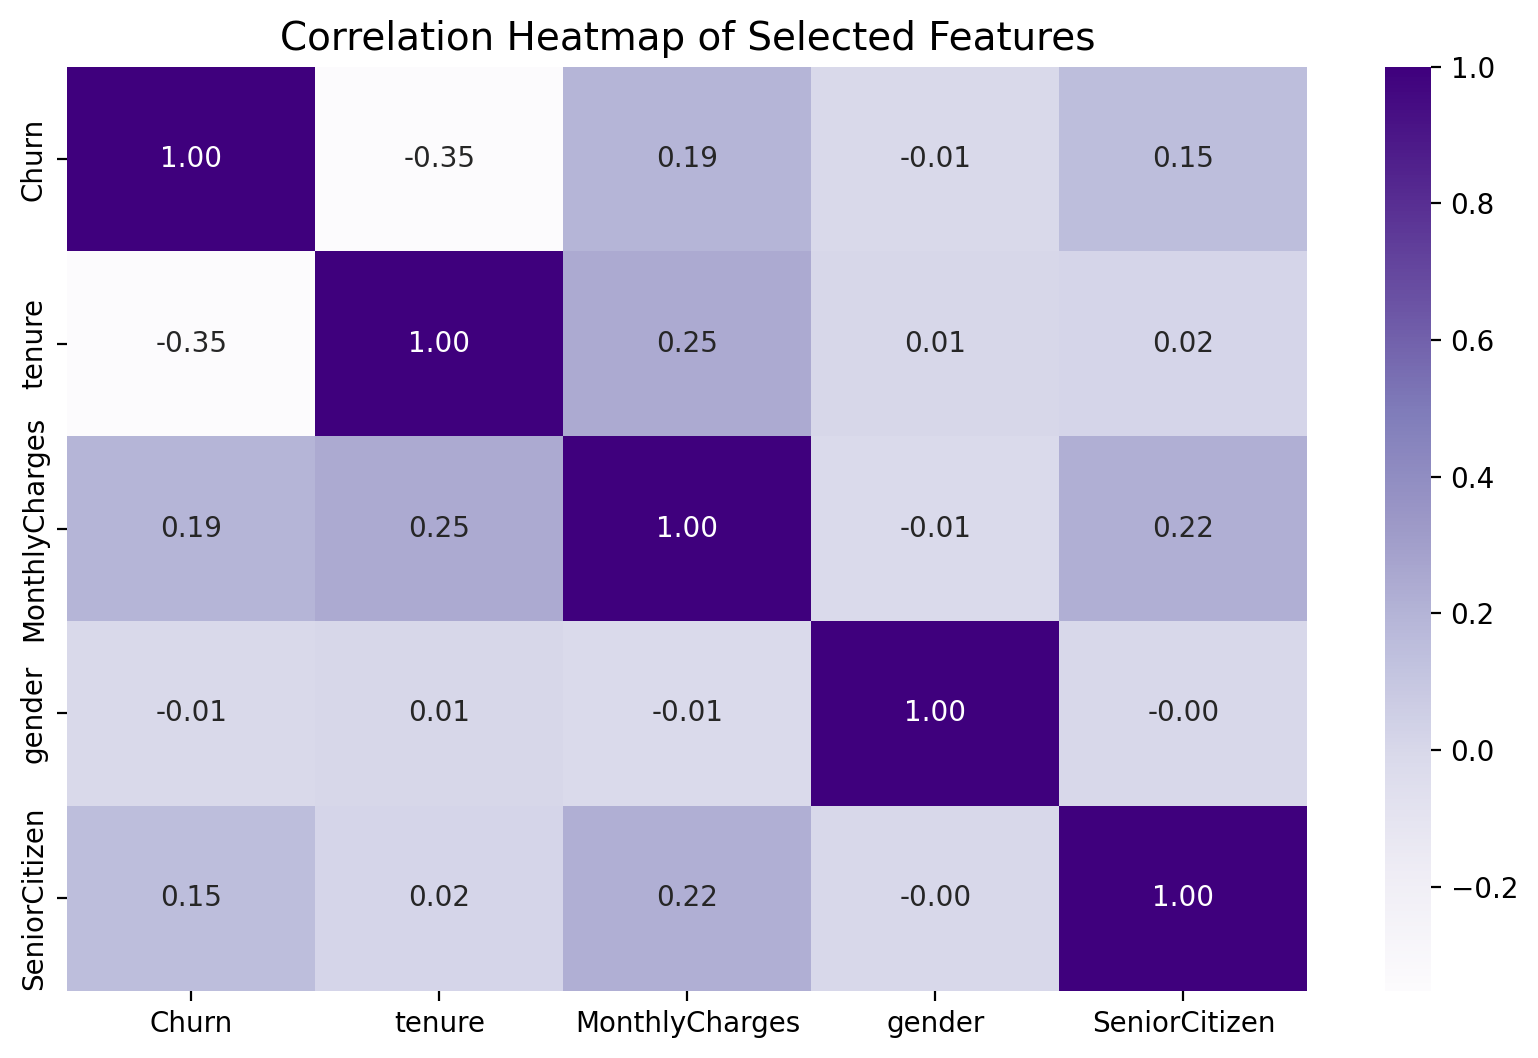

In [34]:
#Focused Correlation Heatmap
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(df[['Churn', 'tenure', 'MonthlyCharges', 'gender', 'SeniorCitizen']].corr(), 
            cmap='Purples', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Selected Features', fontsize=14)
plt.show()

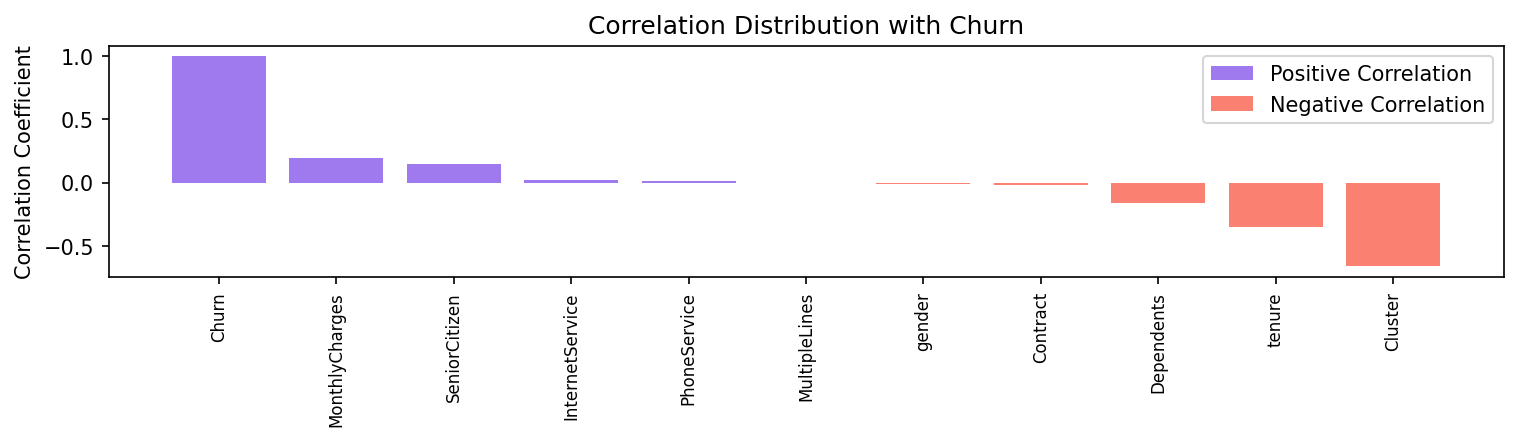

In [35]:
xiang_data = df_dummies.corr()['Churn'].sort_values(ascending=False)# Sort all features by correlation with Churn
zheng_data = xiang_data[xiang_data > 0]# Positively
fu_data = xiang_data[xiang_data < 0]# Negatively
zheng_color = '#9F79EE' 
fu_color = 'salmon' 
fig, ax = plt.subplots(figsize=(12, 2), dpi=150)
zheng_bars = ax.bar(zheng_data.index, zheng_data.values, label='Positive Correlation', color=zheng_color)
fu_bars = ax.bar(fu_data.index, fu_data.values, label='Negative Correlation', color=fu_color)
plt.xticks(rotation=90, fontsize=8)
ax.set_title('Correlation Distribution with Churn')
ax.set_ylabel('Correlation Coefficient')
ax.legend()
plt.show()

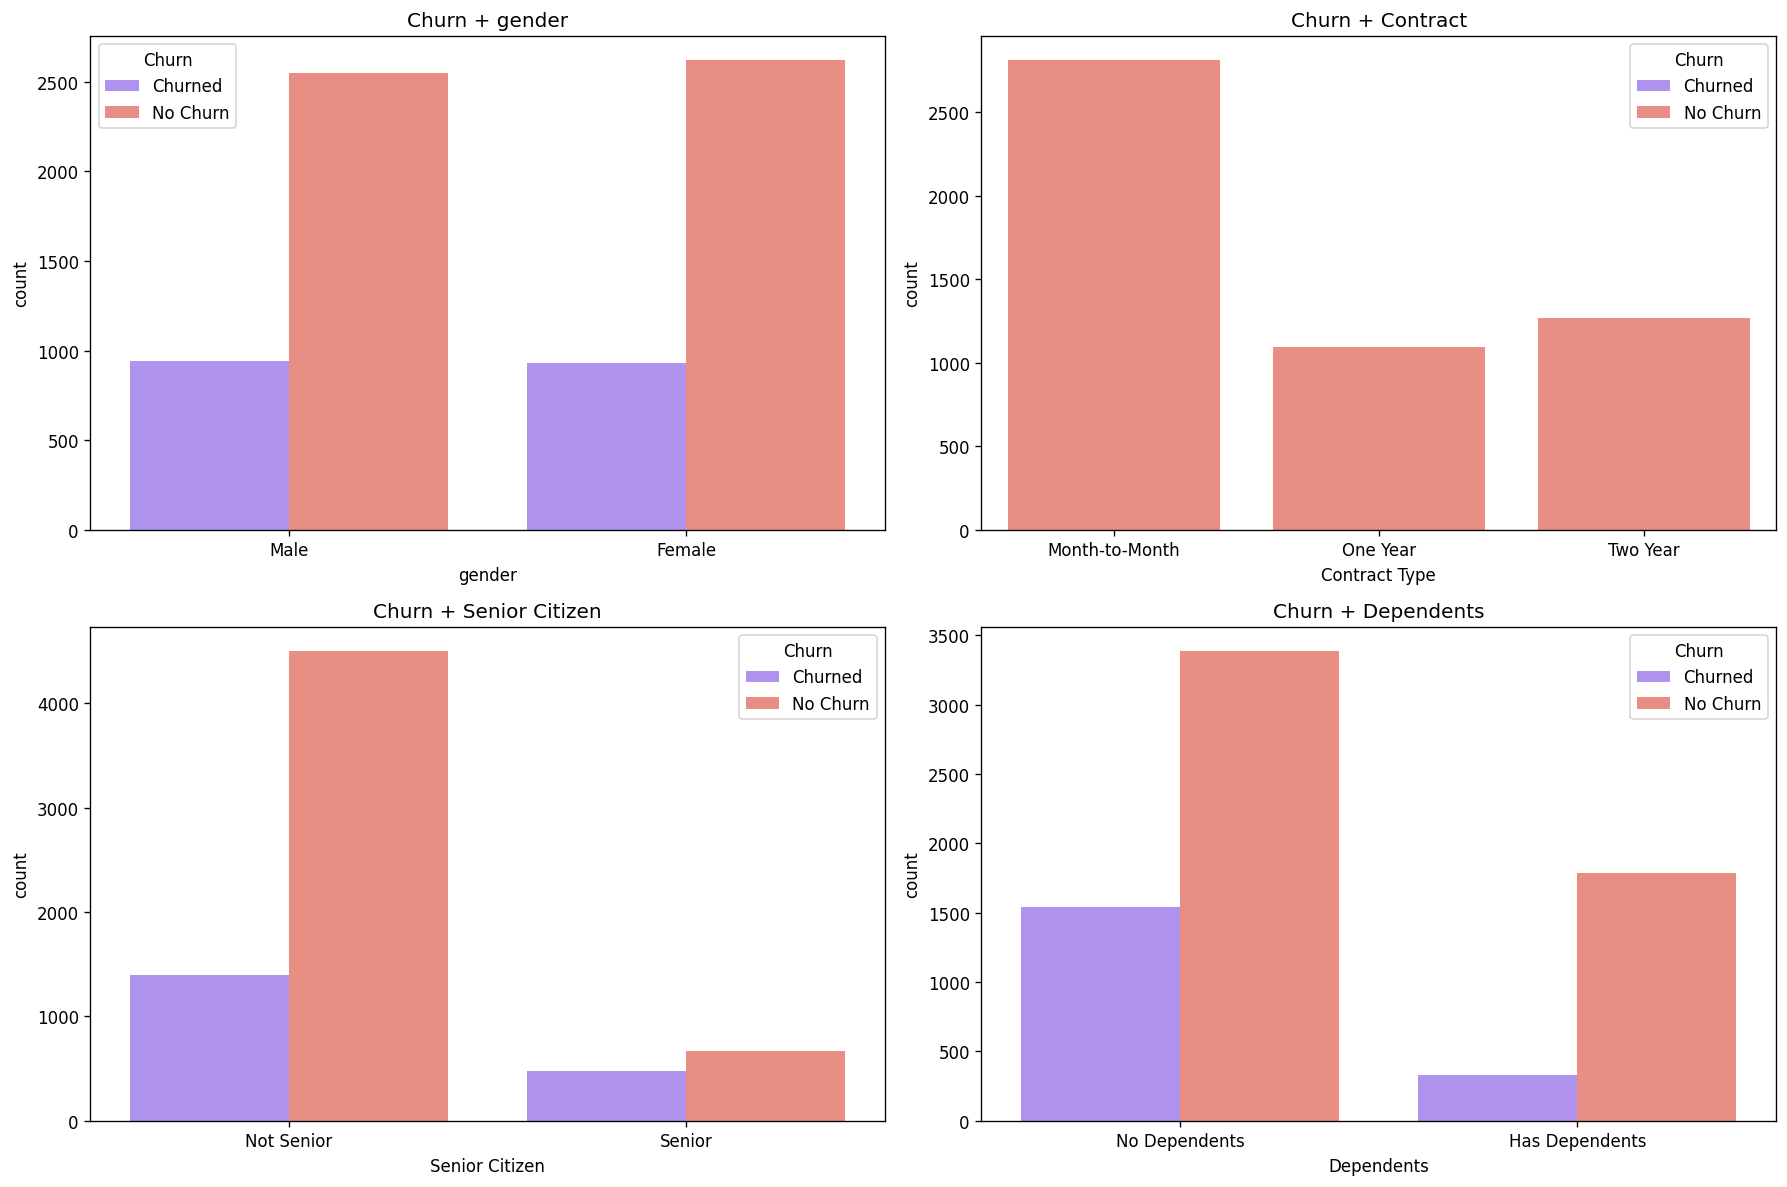

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), dpi=120)
color_palette = ['#AB82FF', 'salmon']
plt.subplot(221)
# Churn by Gender
sns.countplot(x="gender", hue="Churn", data=data, palette=color_palette, dodge=True)
plt.xlabel("gender")
plt.title("Churn + gender")
# Churn by Contract Type
plt.subplot(222)
sns.countplot(x="Contract", hue="Churn", data=data, palette=color_palette, dodge=False)
plt.xlabel("Contract Type")
plt.title("Churn + Contract")
# Churn by SeniorCitizen
plt.subplot(223)
sns.countplot(x="SeniorCitizen", hue="Churn", data=data, palette=color_palette, dodge=True)
plt.xlabel("Senior Citizen")
plt.title("Churn + Senior Citizen")
# Churn by Dependents
plt.subplot(224)
sns.countplot(x="Dependents", hue="Churn", data=data, palette=color_palette, dodge=True)
plt.xlabel("Dependents")
plt.title("Churn + Dependents")

plt.tight_layout()


In [37]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')# Convert tenure to numeric if needed

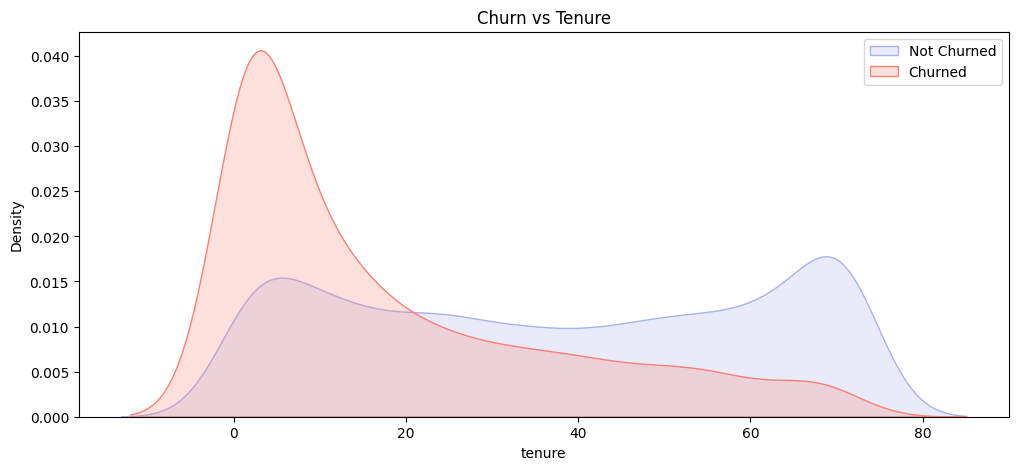

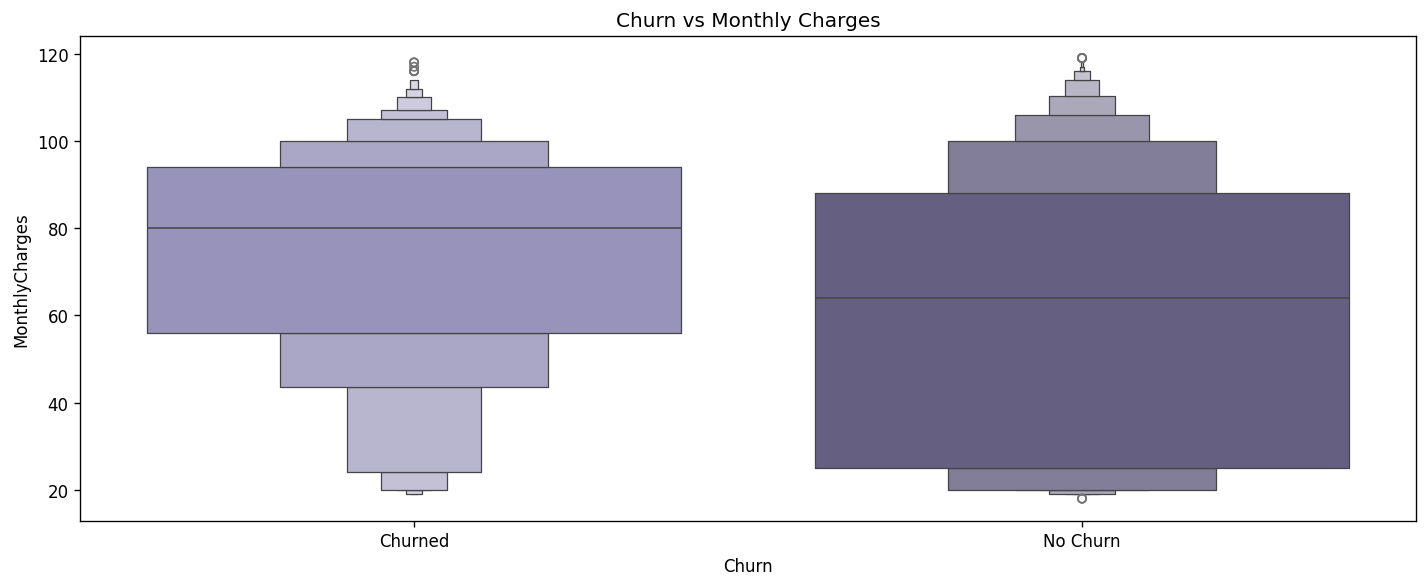

In [38]:
plt.figure(figsize=(12, 5))

sns.kdeplot(data.tenure[df['Churn'] == 0], color="#A8B2F0", fill=True, label="Not Churned")# Not churned
sns.kdeplot(data.tenure[df['Churn'] == 1], color="salmon", fill=True, label="Churned")# Churned
plt.ylabel("Density")
plt.title("Churn vs Tenure")
plt.legend()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), dpi=120)

sns.boxenplot(x="Churn", y="MonthlyCharges", data=data, hue="Churn", palette="Purples_d", legend=False)
ax.set_title("Churn vs Monthly Charges")
plt.tight_layout()
plt.show()


In [45]:
category_cols = ['InternetService', 'SeniorCitizen', 'gender',
                 'PhoneService', 'MultipleLines', 'Dependents',
                 'Contract', 'Cluster']  
numeric_cols = ['tenure', 'MonthlyCharges']
target = 'Churn'

assert len(category_cols) + len(numeric_cols) + 1 == data.shape[1]

In [50]:
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4] 
}

alg = RandomForestClassifier(random_state=15)

grid_search = GridSearchCV(alg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("The optimal combination of hyperparameters is:", grid_search.best_params_)

best_alg = grid_search.best_estimator_
best_alg.fit(X_train, y_train)

scores = cross_val_score(best_alg, X_train, y_train, cv=10)
print(scores.mean())
print(scores)

The optimal combination of hyperparameters is: {'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
0.9754563894523327
[0.97565923 0.98174442 0.97363083 0.97768763 0.96957404 0.97971602
 0.97565923 0.97160243 0.97768763 0.97160243]


C:\Users\13295\AppData\Local\Temp\ipykernel_4340\3426316248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


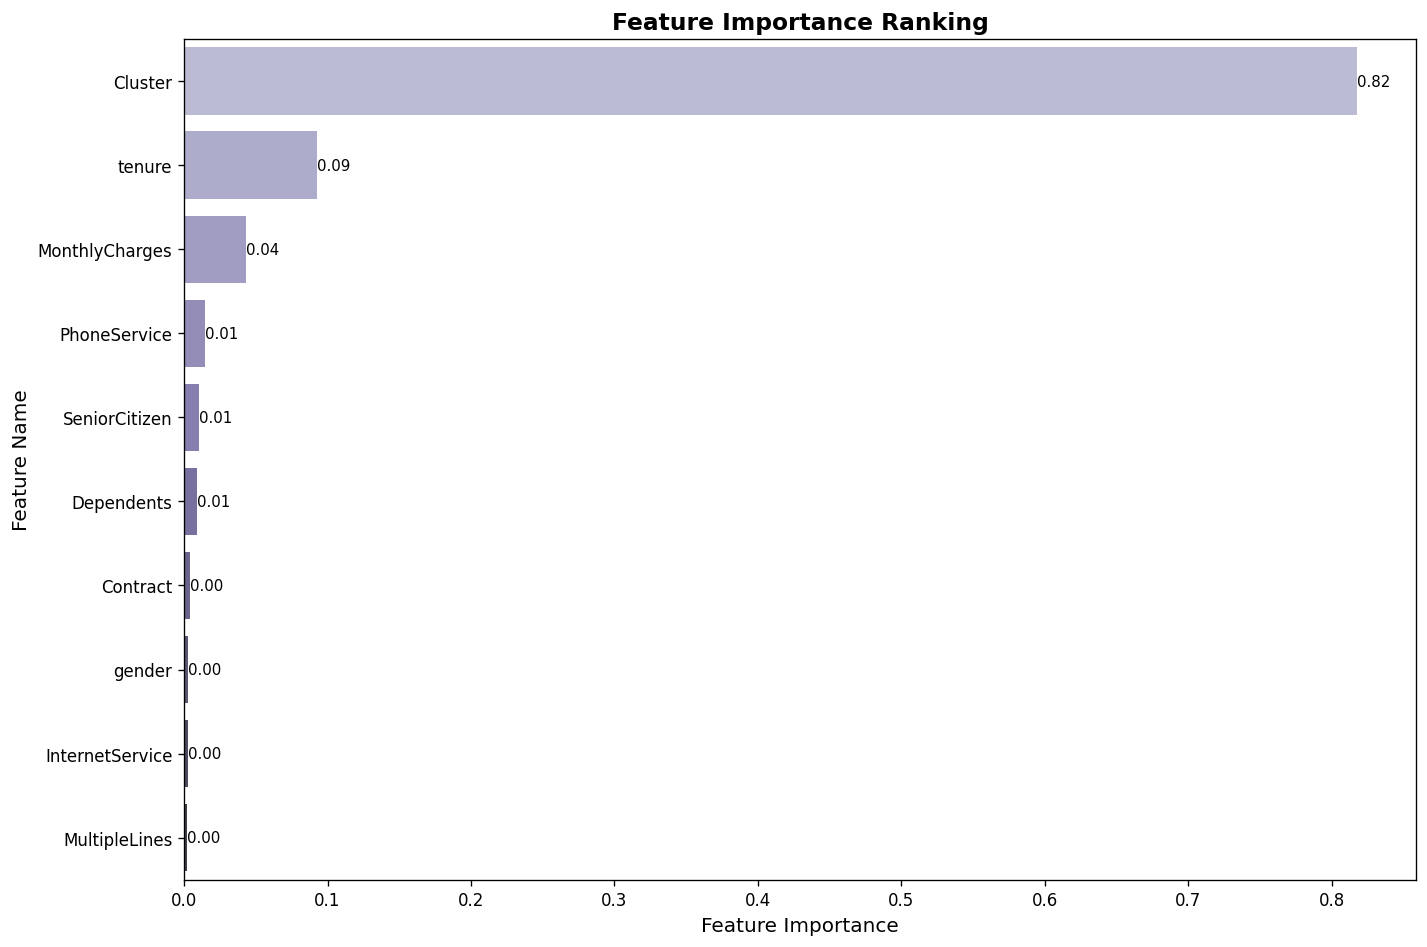

In [66]:
plt.figure(figsize=(12, 8), dpi=120)
ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=topfeatures,
    hue=None,
    palette='Purples_d'
)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.title('Feature Importance Ranking', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [56]:
# Make predictions on the test set and calculate evaluation metrics
y_pred = best_alg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy on the test set:", accuracy)
print("Precision on the test set:", precision)
print("Recall on the test set:", recall)
print("F1 Score on the test set:", f1)

Accuracy on the test set: 0.9730241362991008
Precision on the test set: 0.9756554307116105
Recall on the test set: 0.9221238938053097
F1 Score on the test set: 0.9481346678798908


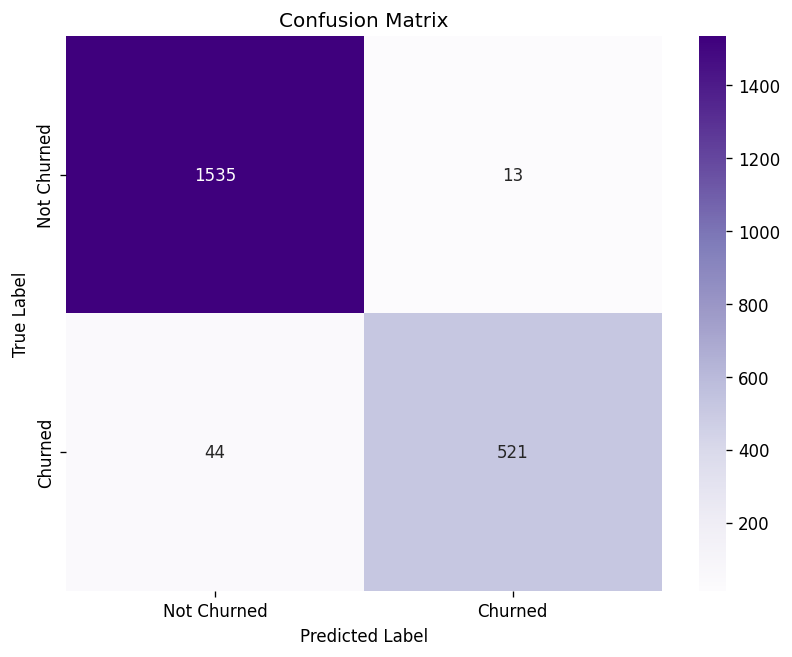

In [57]:
# Train model again with the best hyperparameters
best_alg = grid_search.best_estimator_
best_alg.fit(X_train, y_train)

y_pred = best_alg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6), dpi=120)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Not Churned", "Churned"],
            yticklabels=["Not Churned", "Churned"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

AUC Score: 0.9910429672314834


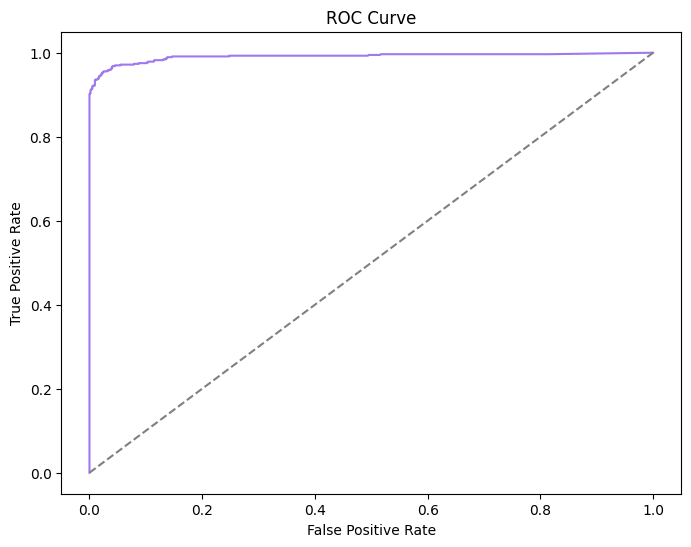

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = best_alg.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr, tpr, color='#9F79EE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random guess)
plt.show()

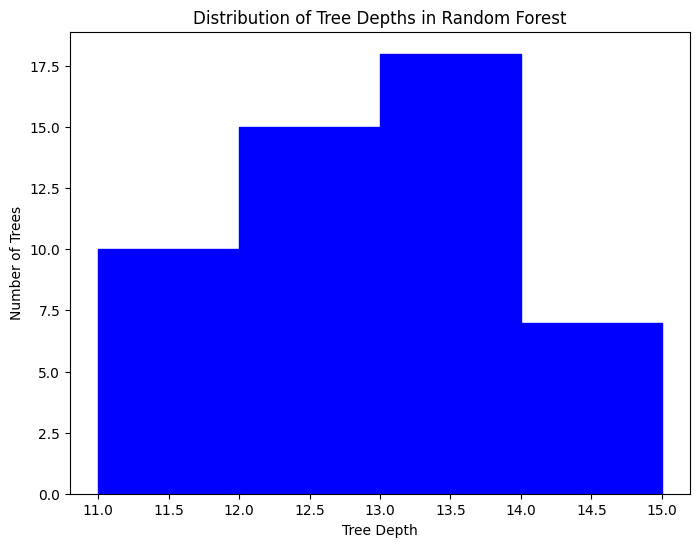

In [65]:
# Get the maximum depth of each decision tree in the random forest
tree_depths = [tree.tree_.max_depth for tree in best_alg.estimators_]
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(tree_depths, bins='auto', color='blue', edgecolor='blue')
plt.xlabel('Tree Depth')
plt.ylabel('Number of Trees')
plt.title('Distribution of Tree Depths in Random Forest')
plt.show()